<a href="https://colab.research.google.com/github/TMhdSofyan/ImageProcessing/blob/main/Image_Pore_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install openpnm

In [ ]:
!pip install porespy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import openpnm as pnm
import porespy as ps

In [3]:
import imageio.v2 as imageio

file_path = '/content/drive/MyDrive/00_Image_Processing/Data/BoiseSS3D.tif'

# Read the '.tif' image file
image_data = imageio.imread(file_path)

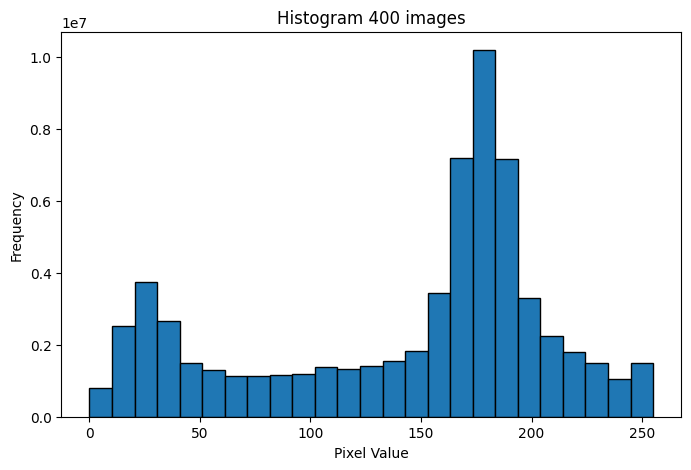

In [4]:
# Create a histogram
fig, ax = plt.subplots(figsize=[8, 5])
ax.hist(image_data.flatten(), bins=25, edgecolor='k')
ax.set_title('Histogram 400 images')
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/Histogram.png', dpi = 600)
plt.show()

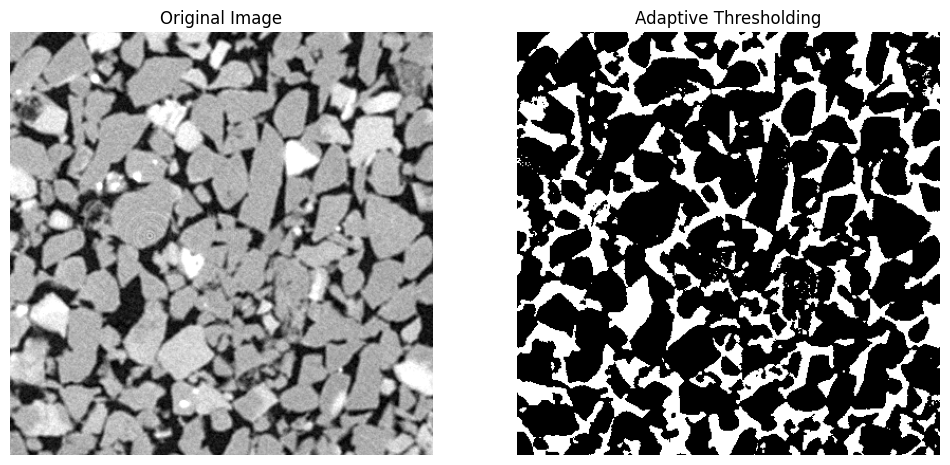

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Choose the layer/frame you want to work with (e.g., the 400th layer)
img_1 = image_data[399,:,:]

# Convert the selected layer to 8-bit unsigned integer (uint8) data type
img_1 = np.uint8(img_1)

# Apply adaptive thresholding
th4 = cv2.adaptiveThreshold(img_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 15)

# Display the original image and the thresholded result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_1, cmap='gray')  # Display the original image
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(th4, cmap='gray')  # Display the thresholded result
ax[1].set_title("Adaptive Thresholding")
ax[1].axis('off')
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/Treshold vs original.png', dpi = 600)
plt.show()

In [6]:
import cv2
import numpy as np

# Inisialisasi list untuk menyimpan hasil thresholding
T = []

# Loop melalui setiap lapisan (frame) dalam image_data
for i in range(image_data.shape[0]):
    # Pilih satu lapisan dari image_data
    imgTest = image_data[i, :, :]

    # Konversi ke uint8 jika diperlukan
    imgTest = np.uint8(imgTest)

    # Terapkan adaptive thresholding
    th3 = cv2.adaptiveThreshold(imgTest, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 15)

    # Tambahkan hasil thresholding ke dalam list T
    T.append(th3)

# Sekarang list T berisi hasil thresholding dari setiap lapisan dalam image_data

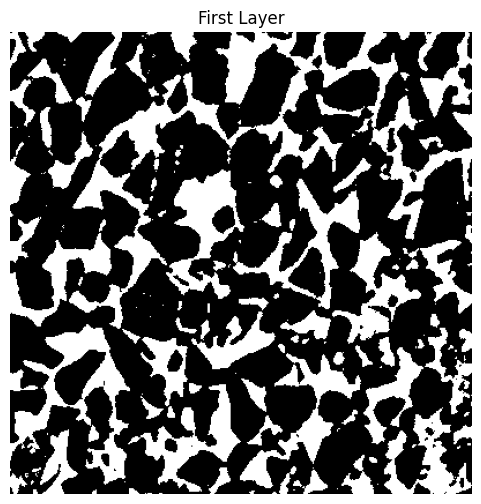

In [7]:
# Assuming you want to visualize the first and second layers (frames)
first_layer = T[0]

# Display the first layer
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.imshow(first_layer, cmap='gray')  # Assuming grayscale, change cmap as needed
plt.title("First Layer")
plt.axis('off')  # Hide axis
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/Treshold.png', dpi = 600)
plt.show()

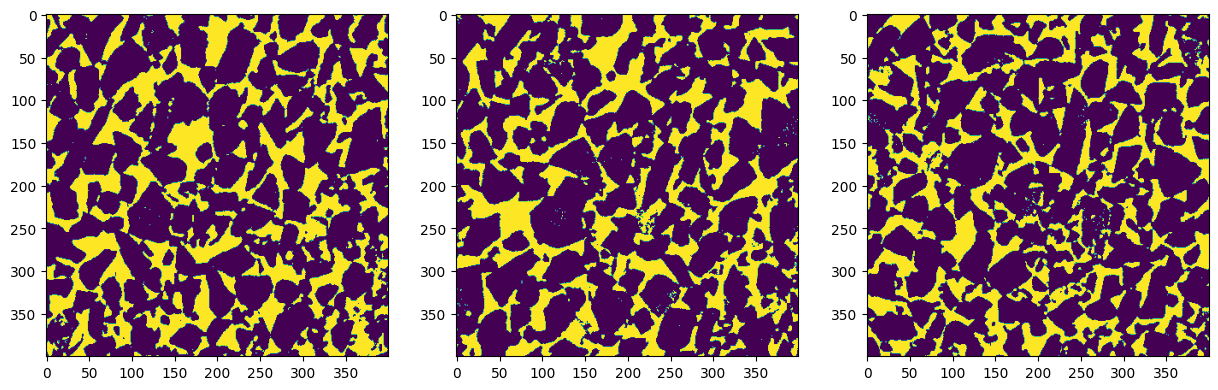

In [8]:
G = image_data
G = np.uint8(T)
#T=T.reshape(Dim_size[0],Dim_size[1],Dim_size[2])
#T = cv2.bitwise_not(T)
fig, ax = plt.subplots(1,3,figsize=[15, 5])
ax[0].imshow(G[0,:,:])
ax[1].imshow(G[25,:,:]);
ax[2].imshow(G[399,:,:]);
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Sample.png', dpi = 600)
plt.show()

In [9]:
G.shape

(400, 400, 400)

In [10]:
# Inisialisasi list untuk menyimpan jumlah piksel hitam (grain)
y = []

# Loop melalui setiap lapisan (frame) dalam T
for img in T:
    # Hitung jumlah piksel hitam dalam lapisan saat ini
    black_pixels = np.count_nonzero(img == 0)

    # Tambahkan hasil perhitungan ke dalam list y
    y.append(black_pixels)

# Sekarang list y berisi jumlah piksel hitam dalam setiap lapisan gambar dalam T

In [11]:
# Inisialisasi list untuk menyimpan fraksi non-hitam (Pori)
fraksi_non_hitam = []

# Loop melalui setiap lapisan (frame) dalam T
for i in range(len(T)):
    # Hitung jumlah piksel non-hitam dalam lapisan saat ini
    non_hitam_pixels = (400*400) - np.count_nonzero(T[i] == 0)

    # Hitung fraksi piksel non-hitam dan tambahkan ke dalam list
    fraksi = non_hitam_pixels / (400*400)
    fraksi_non_hitam.append(fraksi)

# Sekarang fraksi_non_hitam berisi fraksi piksel non-hitam dalam setiap lapisan gambar
print(fraksi_non_hitam)

[0.32388125, 0.325375, 0.32560625, 0.32645625, 0.32606875, 0.32695, 0.3273125, 0.3278375, 0.32765, 0.3273125, 0.32495625, 0.3245625, 0.32178125, 0.32055625, 0.31819375, 0.31699375, 0.31449375, 0.31018125, 0.30734375, 0.30663125, 0.30500625, 0.3040625, 0.3026125, 0.301925, 0.30068125, 0.3005, 0.30028125, 0.29990625, 0.30140625, 0.30305, 0.303575, 0.30388125, 0.30668125, 0.30799375, 0.308375, 0.3093125, 0.31051875, 0.3116125, 0.311175, 0.31189375, 0.313325, 0.31690625, 0.31935625, 0.3203625, 0.32060625, 0.3247, 0.32883125, 0.331425, 0.3329625, 0.33451875, 0.33474375, 0.33485625, 0.3332875, 0.3308125, 0.327925, 0.32466875, 0.32361875, 0.32300625, 0.3225, 0.3230125, 0.3226625, 0.32209375, 0.321575, 0.3212375, 0.3232375, 0.3249125, 0.3250125, 0.3236625, 0.32160625, 0.32129375, 0.32210625, 0.3224875, 0.3218, 0.321525, 0.3205125, 0.318475, 0.31715625, 0.3153375, 0.313575, 0.310625, 0.30873125, 0.30670625, 0.30414375, 0.3039375, 0.30396875, 0.3038875, 0.3042375, 0.3042, 0.30730625, 0.31275, 0.

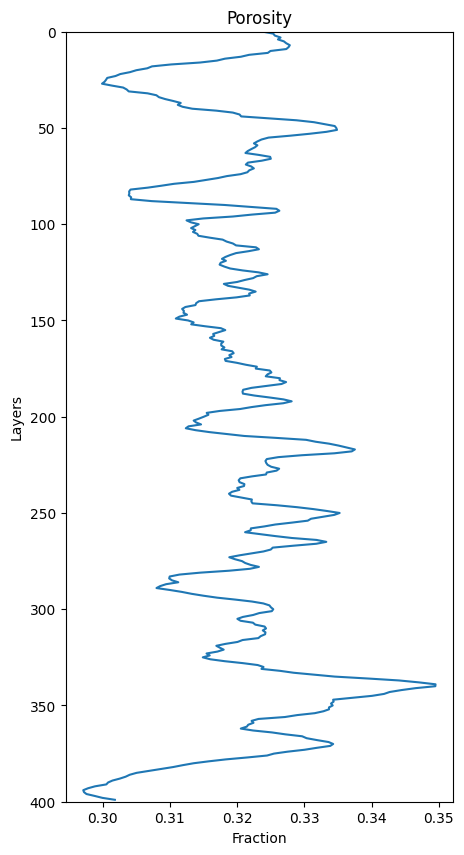

In [12]:
import matplotlib.pyplot as plt

# Inisialisasi list untuk urutan lapisan (indeks lapisan)
indeks_lapisan = list(range(len(fraksi_non_hitam)))

# Membuat plot
fig, ax = plt.subplots(figsize=[5, 10])
ax.plot(fraksi_non_hitam, indeks_lapisan)
ax.set_ylim(0, len(fraksi_non_hitam))  # Invert y-axis agar urutannya dari atas ke bawah
ax.set_xlabel('Fraction')
ax.set_ylabel('Layers')
ax.set_title('Porosity')

# Memanggil invert_yaxis() untuk membalik urutan sumbu y
ax.invert_yaxis()
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Porosity.png', dpi = 600)
plt.show()

In [13]:
import numpy as np

# Ubah list T menjadi array NumPy
T_np = np.array(T)

# Ubah bentuk T menjadi 3D dengan ukuran 400 x 400 x 400
image_size_x = 400
image_size_y = 400
image_size_z = T_np.shape[0]

T_np_3d = np.zeros((image_size_z, image_size_x, image_size_y), dtype=np.uint8)

# Isi setiap lapisan dalam T_np_3d dengan lapisan yang sesuai dari T_np
for i in range(image_size_z):
    T_np_3d[i, :, :] = T_np[i, :, :]

# Sekarang T_np_3d adalah array 3D dengan ukuran 400 x 400 x 400

In [ ]:
snow = ps.networks.snow2(T_np_3d)
net = snow.network
net = ps.networks.label_boundaries(network=net)
for item in net.keys():
    print(item)

In [ ]:
#RUN THIS IF YOU WANT TO CALCULATE THE TORTUOSITY BASED ON PORESPY
#K=T
#results = ps.simulations.tortuosity_fd(im=G, axis=0)
#print(results)

In [ ]:
M=T_np_3d
snow1 = ps.networks.snow2(M,parallelization=None)
net1 = snow1.network
net1 = ps.networks.label_boundaries(network=net1)
for item in net1.keys():
    print(item)

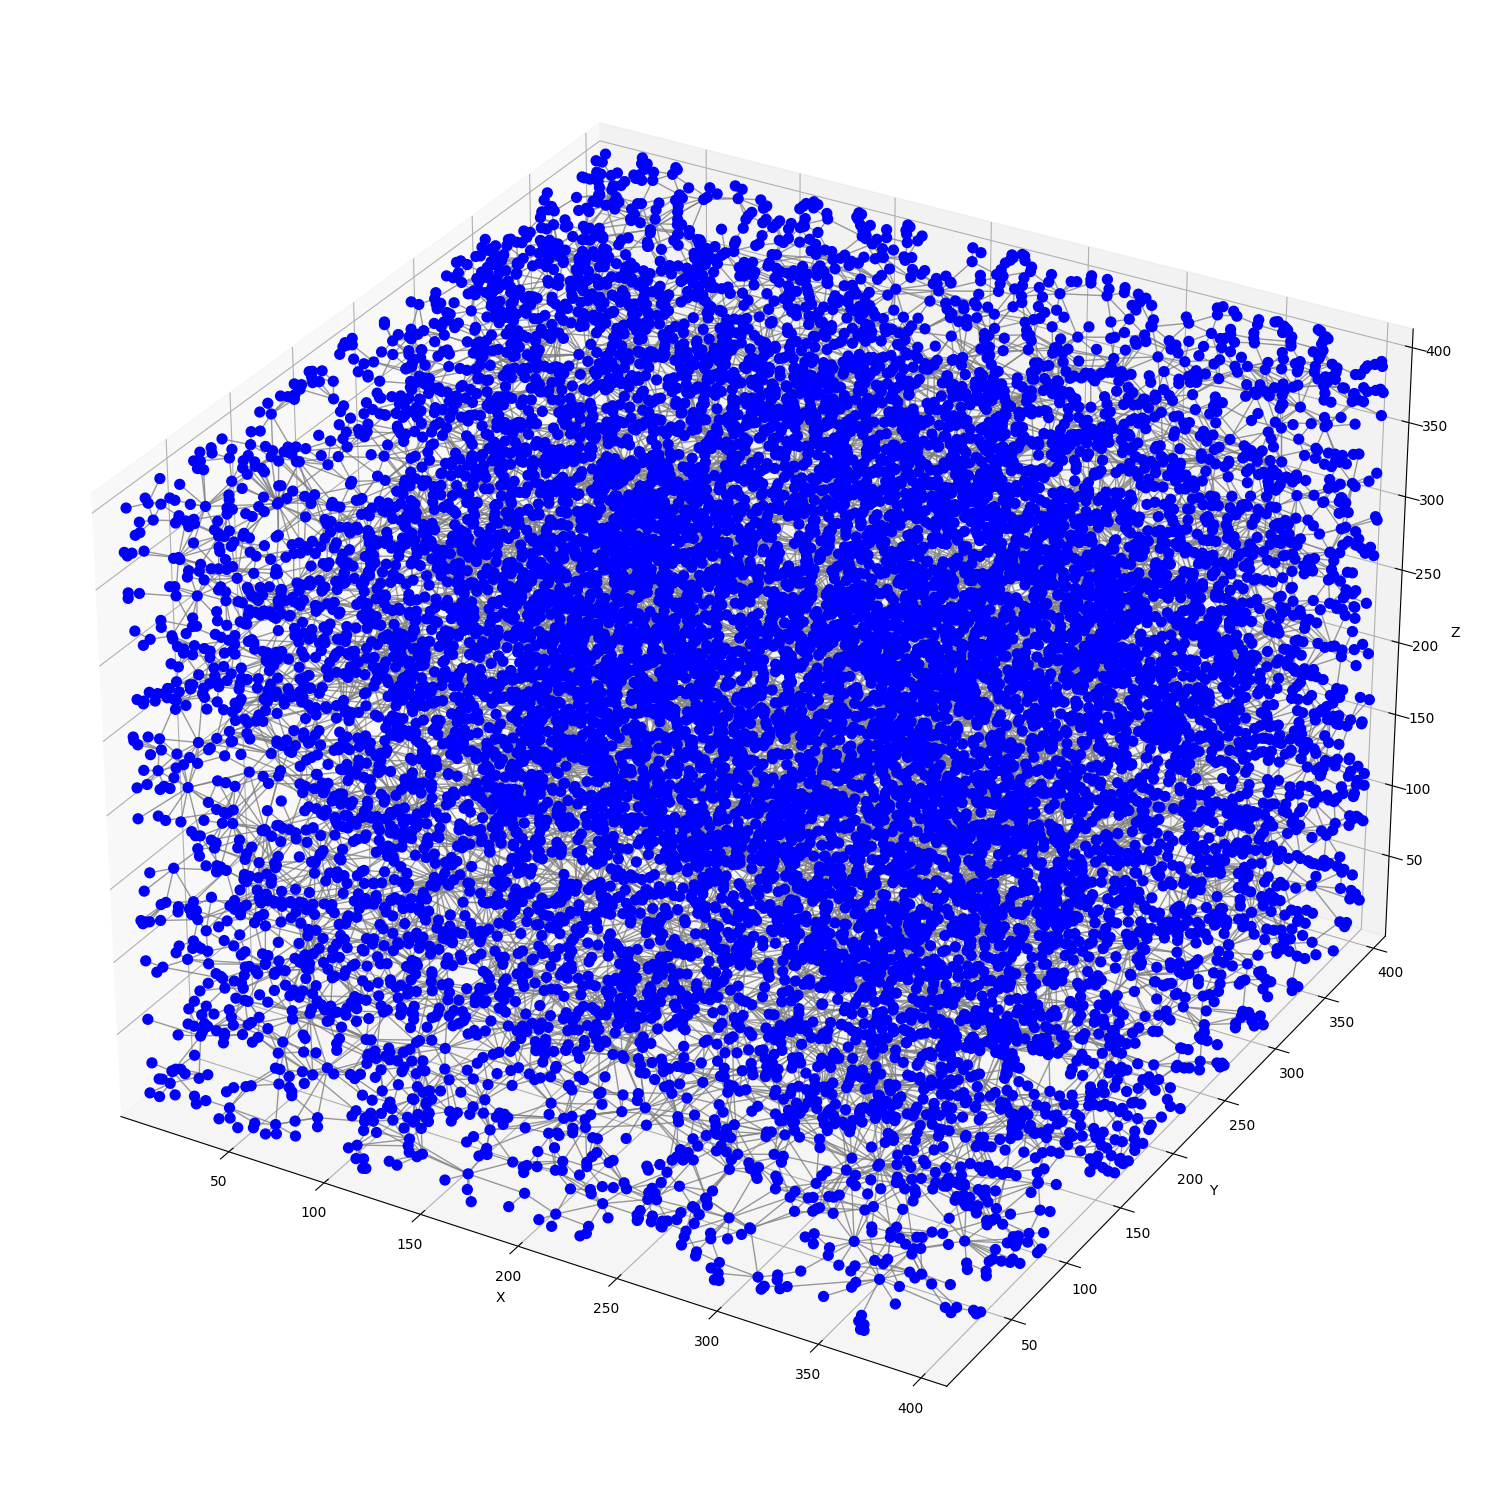

In [17]:
pn = pnm.io.network_from_porespy(net1)
fig, ax = plt.subplots(1, 1, figsize=[15, 15])
ax = pnm.visualization.plot_connections(network=pn, alpha=0.8, color='grey', ax=ax)
ax = pnm.visualization.plot_coordinates(network=pn, ax=ax, color='b', markersize=50)

plt.savefig('/content/drive/MyDrive/00_Image_Processing/Netwrok Model.png', dpi = 600)
# Tampilkan plot
plt.show()

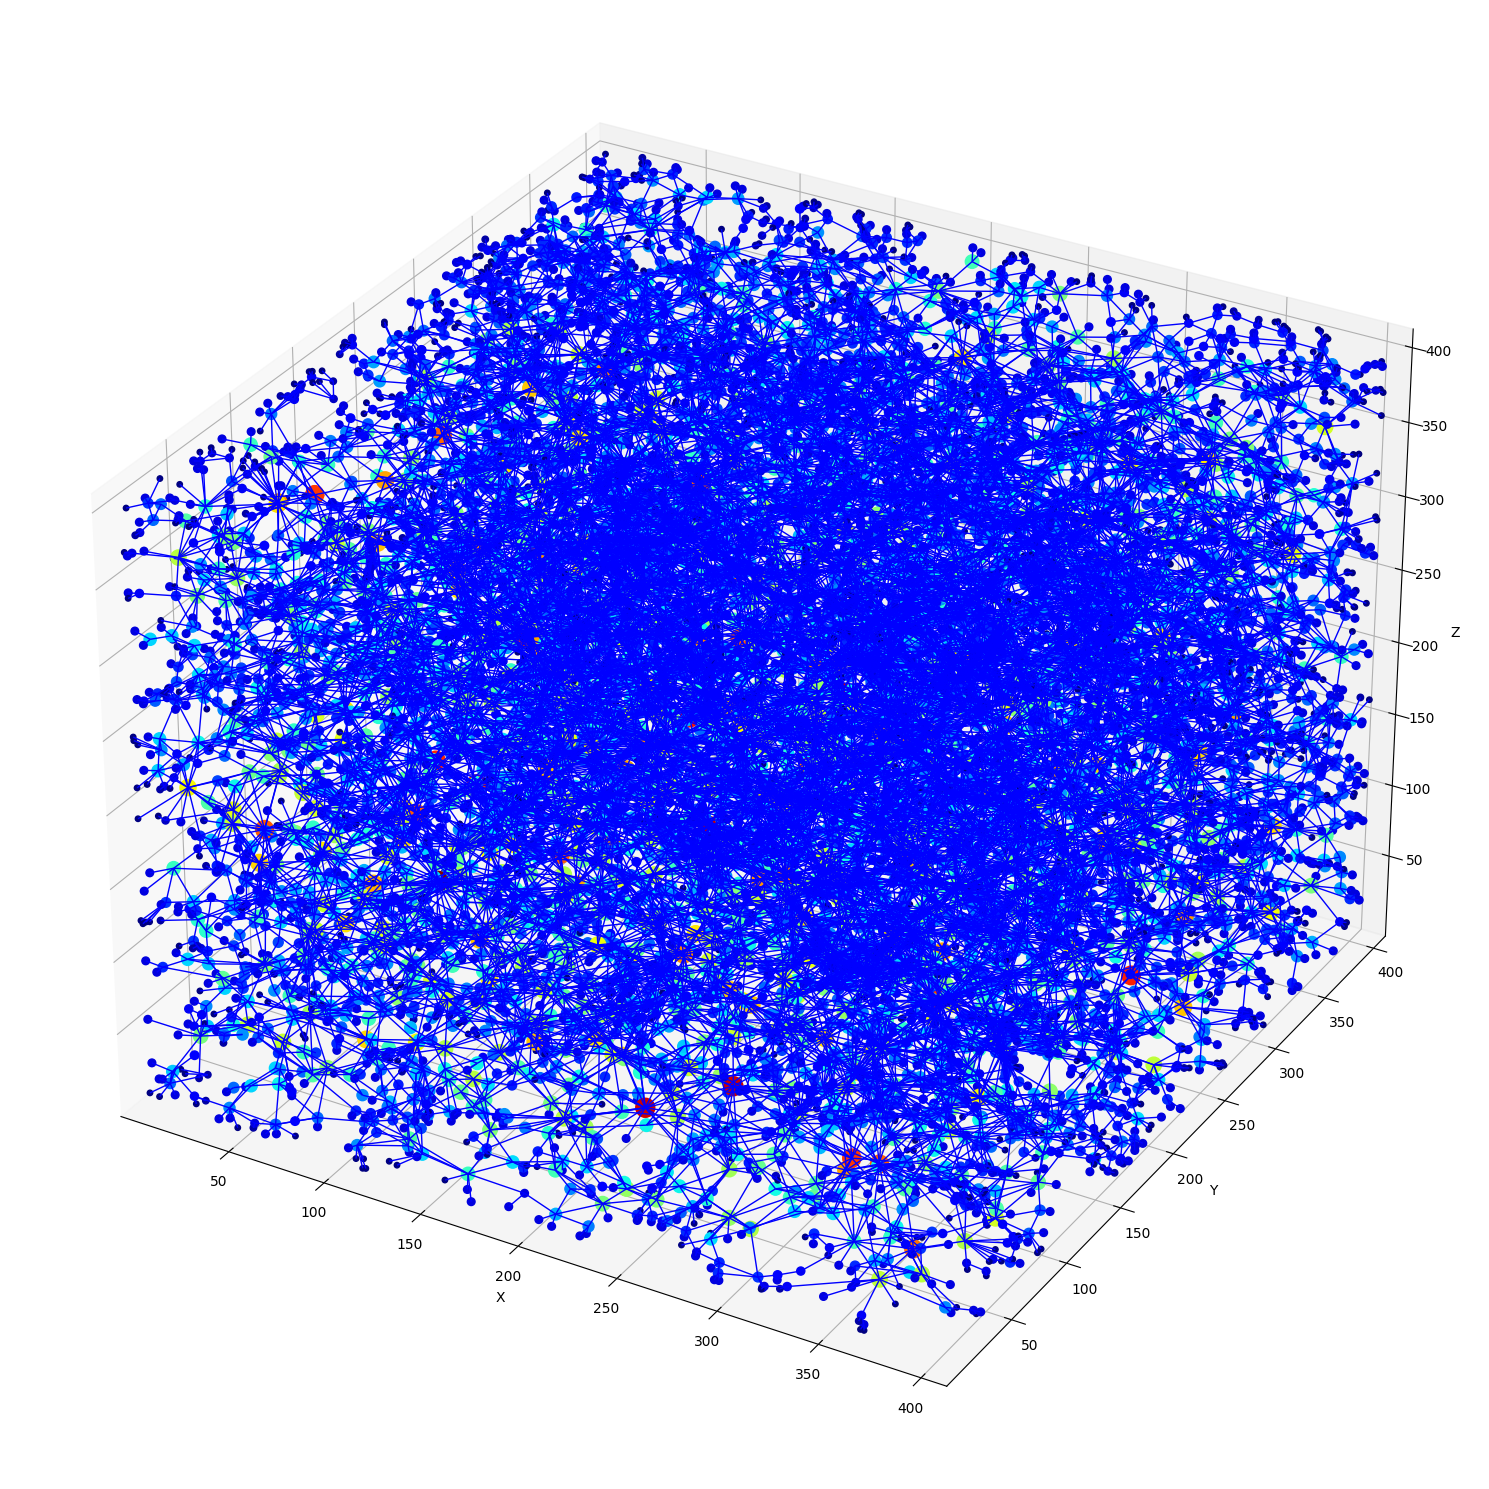

In [27]:
fig, ax = plt.subplots(figsize=[15, 15])
ax.imshow(X, cmap=plt.cm.bone);
pnm.visualization.plot_coordinates(ax=fig,
                                  network=pn,
                                  size_by=pn["pore.inscribed_diameter"],
                                  color_by=pn["pore.inscribed_diameter"],
                                  markersize=200)
pnm.visualization.plot_connections(network=pn, ax=fig)
ax.axis("off");

plt.savefig('/content/drive/MyDrive/00_Image_Processing/Netwrok Model_2.png', dpi = 600)
# Tampilkan plot
plt.show()